In [4]:
import ktwo19.nbody
reload(ktwo19.nbody)
ktwo19.nbody.run_simulation(0)

read table photodyn-samples from load_table_cache.hdf
---------------------------------
REBOUND version:     	3.6.6
REBOUND built on:    	Aug 21 2018 09:37:11
Number of particles: 	3
Selected integrator: 	ias15
Simulation time:     	2.0200000000000000e+03
Current timestep:    	0.001000
---------------------------------
<rebound.Particle object, m=0.88 x=1.13709053409e-07 y=3.77191875915e-07 z=-1.52991165489e-05 vx=7.05670599339e-06 vy=-1.84597952605e-07 vz=2.18638462787e-07>
<rebound.Particle object, m=0.000101853402463 x=-0.000921608366485 y=-0.00245171301859 z=0.090938652729 vx=-0.0471822125355 vy=4.8314003928e-05 vz=-0.00179871171133>
<rebound.Particle object, m=3.47956583174e-05 x=-0.000178040003687 y=-0.00236275276789 z=0.120728032471 vx=-0.0403565404315 vy=0.00452715253061 vz=-0.000264312843881>
---------------------------------


In [1]:
import rebound
import numpy as np
def setupSimulation():
    sim = rebound.Simulation()
    sim.integrator = "ias15" # IAS15 is the default integrator, so we don't need this line
    sim.add(m=1.)
    sim.add(m=1e-3,a=1.)
    sim.add(m=5e-3,a=1.25)
    sim.move_to_com()
    return sim

In [2]:
sim = setupSimulation()
sim.integrate(100.*2.*np.pi)

In [3]:
for o in sim.calculate_orbits():
    print(o)


<rebound.Orbit instance, a=4.79596389843 e=0.718624643677 inc=0.0 Omega=0.0 omega=2.73520208207 f=-2.06744745317>
<rebound.Orbit instance, a=1.04238739677 e=0.122392957814 inc=0.0 Omega=0.0 omega=-0.355162818472 f=-1.45023075481>


In [4]:
sim = setupSimulation() # Resets everything
sim.exit_min_distance = 0.15
Noutputs = 1000
times = np.linspace(0,100.*2.*np.pi,Noutputs)
distances = np.zeros(Noutputs)
ps = sim.particles # ps is now an array of pointers. It will update as the simulation runs.
try:
    for i,time in enumerate(times):
        sim.integrate(time)
        dp = ps[1] - ps[2]   # Calculates the coponentwise difference between particles
        distances[i] = np.sqrt(dp.x*dp.x+dp.y*dp.y+dp.z*dp.z)
except rebound.Encounter as error:
    print(error)

Two particles had a close encounter (d<exit_min_distance).


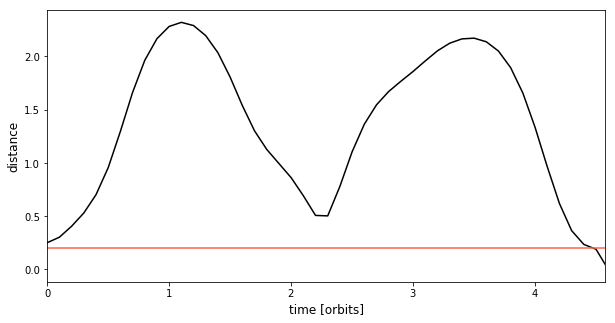

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,5))
ax = plt.subplot(111)
ax.set_xlabel("time [orbits]")
ax.set_xlim([0,sim.t/(2.*np.pi)])
ax.set_ylabel("distance")
plt.plot(times/(2.*np.pi), distances);
plt.plot([0.0,12],[0.2,0.2]); # Plot our close encounter criteria;